## Intelligent Robotics Python Library 사용 예제 3
## Written by 최동일, dongilc@mju.ac.kr

In [1]:
import intelligent_robotics as ir
import sympy
sympy.init_printing()

### 예제 3. 연습문제 3-5의 RRPR형 로봇

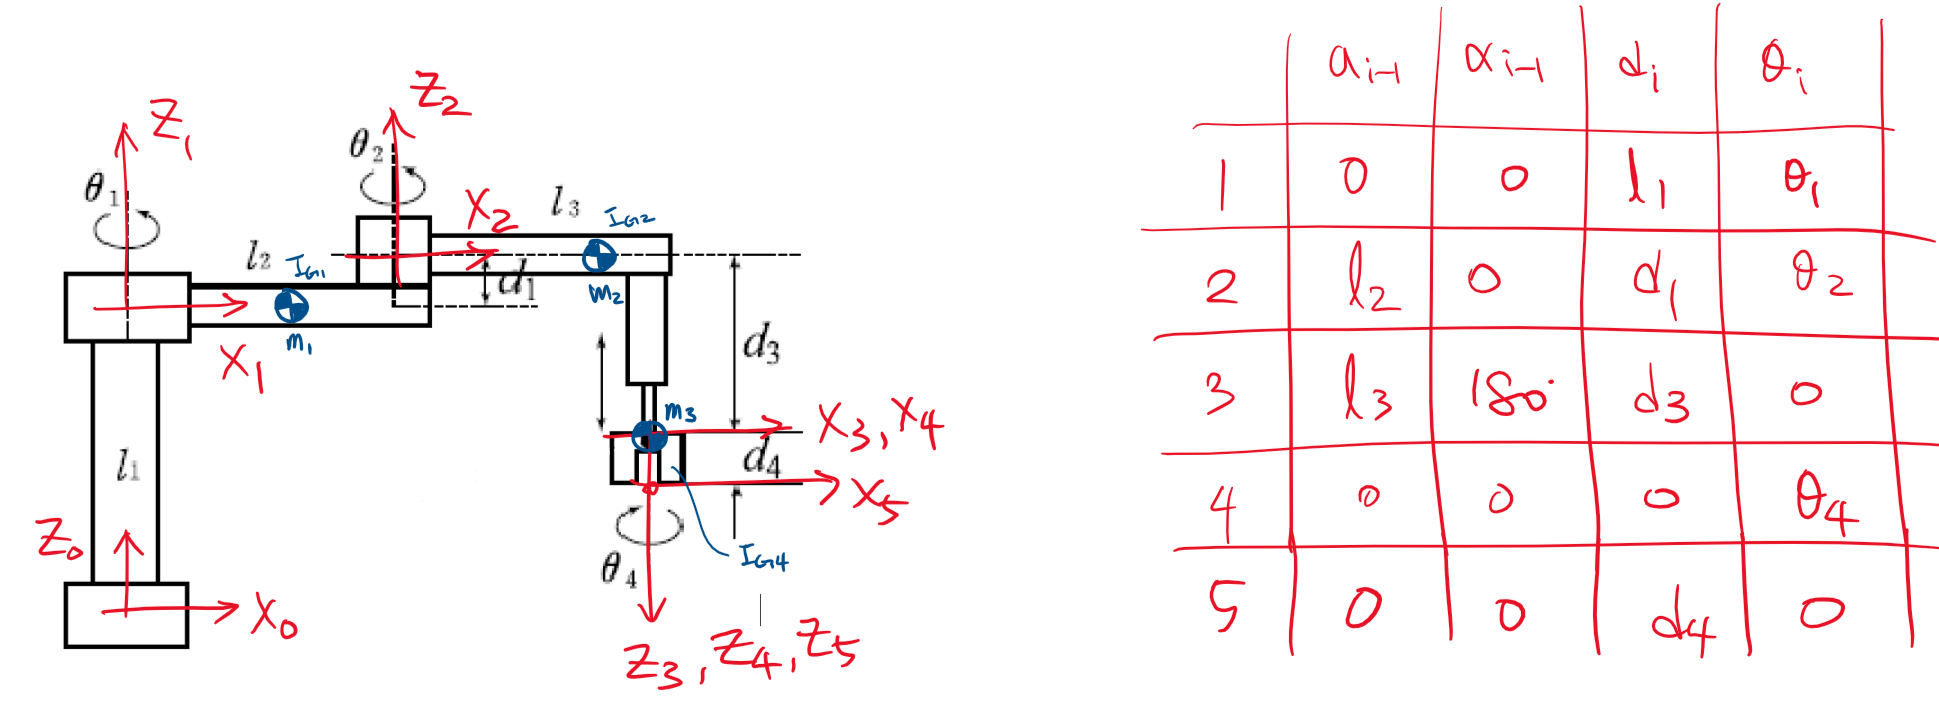

In [2]:
from IPython.display import Image
Image('figure/practice_3.5_fig.PNG', width=800)

In [3]:
th1,th2,d3,th4 = ir.dynamicsymbols('th1,th2,d3,th4')

In [4]:
l1,l2,l2g,l3,l3g,d1,d4,IG1,IG2,IG4,m1,m2,m3 = sympy.symbols('l1,l2,l2g,l3,l3g,d1,d4,IG1,IG2,IG4,m1,m2,m3')

#### DH Parameter를 이용한 동차변환 구하기

In [5]:
T01 = ir.DH(0,0,l1,th1)

In [6]:
T12 = ir.DH(l2,0,d1,th2)

In [7]:
T23 = ir.DH(l3,sympy.rad(180),d3,0)

In [8]:
T34 = ir.DH(0,0,0,th4)

In [9]:
T45 = ir.DH(0,0,d4,0)

In [10]:
T01, T12, T23, T34, T45

⎛⎡cos(th₁(t))  -sin(th₁(t))  0  0 ⎤  ⎡cos(th₂(t))  -sin(th₂(t))  0  l₂⎤  ⎡1  0
⎜⎢                                ⎥  ⎢                                ⎥  ⎢    
⎜⎢sin(th₁(t))  cos(th₁(t))   0  0 ⎥  ⎢sin(th₂(t))  cos(th₂(t))   0  0 ⎥  ⎢0  -
⎜⎢                                ⎥, ⎢                                ⎥, ⎢    
⎜⎢     0            0        1  l₁⎥  ⎢     0            0        1  d₁⎥  ⎢0  0
⎜⎢                                ⎥  ⎢                                ⎥  ⎢    
⎝⎣     0            0        0  1 ⎦  ⎣     0            0        0  1 ⎦  ⎣0  0

   0     l₃  ⎤  ⎡cos(th₄(t))  -sin(th₄(t))  0  0⎤  ⎡1  0  0  0 ⎤⎞
             ⎥  ⎢                               ⎥  ⎢           ⎥⎟
1  0     0   ⎥  ⎢sin(th₄(t))  cos(th₄(t))   0  0⎥  ⎢0  1  0  0 ⎥⎟
             ⎥, ⎢                               ⎥, ⎢           ⎥⎟
   -1  -d₃(t)⎥  ⎢     0            0        1  0⎥  ⎢0  0  1  d₄⎥⎟
             ⎥  ⎢                               ⎥  ⎢           ⎥⎟
   0     1   ⎦  ⎣     0            0        0  1⎦ 

In [65]:
sympy.simplify(T01@T12@T23@T34@T45)

⎡cos(th₁(t) + th₂(t) - th₄(t))  sin(th₁(t) + th₂(t) - th₄(t))   0   l₂⋅cos(th₁
⎢                                                                             
⎢sin(th₁(t) + th₂(t) - th₄(t))  -cos(th₁(t) + th₂(t) - th₄(t))  0   l₂⋅sin(th₁
⎢                                                                             
⎢              0                              0                 -1            
⎢                                                                             
⎣              0                              0                 0             

(t)) + l₃⋅cos(th₁(t) + th₂(t))⎤
                              ⎥
(t)) + l₃⋅sin(th₁(t) + th₂(t))⎥
                              ⎥
d₁ - d₄ + l₁ - d₃(t)          ⎥
                              ⎥
         1                    ⎦

#### 자코비안 구하기

In [12]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,th1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,th2.diff())
w_3_3 = ir.get_angular_vel_P(T23,w_2_2)
w_4_4 = ir.get_angular_vel_R(T34,w_3_3,th4.diff())
w_5_5 = ir.get_angular_vel_R(T45,w_4_4,0)

In [13]:
w_1_1,w_2_2,w_3_3,w_4_4,w_5_5

⎛⎡    0     ⎤  ⎡           0           ⎤  ⎡            0            ⎤  ⎡      
⎜⎢          ⎥  ⎢                       ⎥  ⎢                         ⎥  ⎢      
⎜⎢    0     ⎥  ⎢           0           ⎥  ⎢            0            ⎥  ⎢      
⎜⎢          ⎥, ⎢                       ⎥, ⎢                         ⎥, ⎢      
⎜⎢d         ⎥  ⎢d            d         ⎥  ⎢  d            d         ⎥  ⎢  d   
⎜⎢──(th₁(t))⎥  ⎢──(th₁(t)) + ──(th₂(t))⎥  ⎢- ──(th₁(t)) - ──(th₂(t))⎥  ⎢- ──(t
⎝⎣dt        ⎦  ⎣dt           dt        ⎦  ⎣  dt           dt        ⎦  ⎣  dt  

            0                   ⎤  ⎡                  0                   ⎤⎞
                                ⎥  ⎢                                      ⎥⎟
            0                   ⎥  ⎢                  0                   ⎥⎟
                                ⎥, ⎢                                      ⎥⎟
         d            d         ⎥  ⎢  d            d            d         ⎥⎟
h₁(t)) - ──(th₂(t)) + ──(th₄(t))⎥  ⎢- ──(th₁(t)) - ──(th₂(t))

In [14]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_P(T23,w_2_2,v_2_2,d3.diff())
v_4_4 = ir.get_linear_vel_R(T34,w_3_3,v_3_3)
v_5_5 = ir.get_linear_vel_R(T45,w_4_4,v_4_4)

In [15]:
v_1_1,v_2_2,v_3_3,v_4_4,v_5_5

⎛                                  ⎡                               d          
⎜     ⎡               d         ⎤  ⎢                l₂⋅sin(th₂(t))⋅──(th₁(t)) 
⎜     ⎢l₂⋅sin(th₂(t))⋅──(th₁(t))⎥  ⎢                               dt         
⎜⎡0⎤  ⎢               dt        ⎥  ⎢                                          
⎜⎢ ⎥  ⎢                         ⎥  ⎢                 d               ⎛d       
⎜⎢0⎥, ⎢               d         ⎥, ⎢- l₂⋅cos(th₂(t))⋅──(th₁(t)) - l₃⋅⎜──(th₁(t
⎜⎢ ⎥  ⎢l₂⋅cos(th₂(t))⋅──(th₁(t))⎥  ⎢                 dt              ⎝dt      
⎜⎣0⎦  ⎢               dt        ⎥  ⎢                                          
⎜     ⎢                         ⎥  ⎢                        d                 
⎜     ⎣            0            ⎦  ⎢                        ──(d₃(t))         
⎝                                  ⎣                        dt                

                ⎤  ⎡                            d            ⎛                
                ⎥  ⎢ l₂⋅sin(th₂(t))⋅cos(th₄(t))⋅──(

In [16]:
qd = sympy.Matrix([[th1.diff()],[th2.diff()],[d3.diff()],[th4.diff()]])

In [17]:
J_5_5 = ir.get_Jacobian_from_vel(w_5_5,v_5_5,qd)

In [18]:
# Body Jacobian
J_5_5

⎡l₂⋅sin(th₂(t) - th₄(t)) - l₃⋅sin(th₄(t))   -l₃⋅sin(th₄(t))  0  0⎤
⎢                                                                ⎥
⎢-l₂⋅cos(th₂(t) - th₄(t)) - l₃⋅cos(th₄(t))  -l₃⋅cos(th₄(t))  0  0⎥
⎢                                                                ⎥
⎢                    0                             0         1  0⎥
⎢                                                                ⎥
⎢                    0                             0         0  0⎥
⎢                                                                ⎥
⎢                    0                             0         0  0⎥
⎢                                                                ⎥
⎣                   -1                            -1         0  1⎦

In [19]:
w_0_5 = ir.get_R_from_T(T01*T12*T23*T34*T45)*w_5_5
v_0_5 = ir.get_R_from_T(T01*T12*T23*T34*T45)*v_5_5
J_0_5 = ir.get_Jacobian_from_vel(w_0_5,v_0_5,qd)

In [20]:
# Space Jacobian
J_0_5

⎡-l₂⋅sin(th₁(t)) - l₃⋅sin(th₁(t) + th₂(t))  -l₃⋅sin(th₁(t) + th₂(t))  0   0 ⎤
⎢                                                                           ⎥
⎢l₂⋅cos(th₁(t)) + l₃⋅cos(th₁(t) + th₂(t))   l₃⋅cos(th₁(t) + th₂(t))   0   0 ⎥
⎢                                                                           ⎥
⎢                    0                                 0              -1  0 ⎥
⎢                                                                           ⎥
⎢                    0                                 0              0   0 ⎥
⎢                                                                           ⎥
⎢                    0                                 0              0   0 ⎥
⎢                                                                           ⎥
⎣                    1                                 1              0   -1⎦

#### 머니퓰레이터 정역학 구하기

In [21]:
f_x, f_y, f_z = sympy.symbols('f_x, f_y, f_z')

In [22]:
f_5_5 = sympy.Matrix([[f_x],[f_y],[f_z]])
n_5_5 = sympy.Matrix([[0],[0],[0]])

In [23]:
f_4_4 = ir.get_statics_force_i(T45, f_5_5)
f_3_3 = ir.get_statics_force_i(T34, f_4_4)
f_2_2 = ir.get_statics_force_i(T23, f_3_3)
f_1_1 = ir.get_statics_force_i(T12, f_2_2)

In [24]:
f_4_4, f_3_3, f_2_2, f_1_1

⎛⎡fₓ ⎤  ⎡fₓ⋅cos(th₄(t)) - f_y⋅sin(th₄(t))⎤  ⎡fₓ⋅cos(th₄(t)) - f_y⋅sin(th₄(t)) 
⎜⎢   ⎥  ⎢                                ⎥  ⎢                                 
⎜⎢f_y⎥, ⎢fₓ⋅sin(th₄(t)) + f_y⋅cos(th₄(t))⎥, ⎢-fₓ⋅sin(th₄(t)) - f_y⋅cos(th₄(t))
⎜⎢   ⎥  ⎢                                ⎥  ⎢                                 
⎝⎣f_z⎦  ⎣              f_z               ⎦  ⎣              -f_z               

⎤  ⎡fₓ⋅cos(th₂(t) - th₄(t)) + f_y⋅sin(th₂(t) - th₄(t))⎤⎞
⎥  ⎢                                                  ⎥⎟
⎥, ⎢fₓ⋅sin(th₂(t) - th₄(t)) - f_y⋅cos(th₂(t) - th₄(t))⎥⎟
⎥  ⎢                                                  ⎥⎟
⎦  ⎣                       -f_z                       ⎦⎠

In [25]:
n_4_4 = ir.get_statics_torque_i(T45, n_5_5, f_4_4)
n_3_3 = ir.get_statics_torque_i(T34, n_4_4, f_3_3)
n_2_2 = ir.get_statics_torque_i(T23, n_3_3, f_2_2)
n_1_1 = ir.get_statics_torque_i(T12, n_2_2, f_1_1)

In [26]:
n_4_4, n_3_3, n_2_2, n_1_1

⎛⎡-d₄⋅f_y⎤  ⎡-d₄⋅(fₓ⋅sin(th₄(t)) + f_y⋅cos(th₄(t)))⎤  ⎡                     -(
⎜⎢       ⎥  ⎢                                      ⎥  ⎢                       
⎜⎢ d₄⋅fₓ ⎥, ⎢d₄⋅(fₓ⋅cos(th₄(t)) - f_y⋅sin(th₄(t))) ⎥, ⎢-d₄⋅(fₓ⋅cos(th₄(t)) - f
⎜⎢       ⎥  ⎢                                      ⎥  ⎢                       
⎝⎣   0   ⎦  ⎣                  0                   ⎦  ⎣                       

d₄ + d₃(t))⋅(fₓ⋅sin(th₄(t)) + f_y⋅cos(th₄(t)))                     ⎤  ⎡    -d₁
                                                                   ⎥  ⎢       
_y⋅sin(th₄(t))) + f_z⋅l₃ - (fₓ⋅cos(th₄(t)) - f_y⋅sin(th₄(t)))⋅d₃(t)⎥, ⎢d₁⋅fₓ⋅c
                                                                   ⎥  ⎢       
   -l₃⋅(fₓ⋅sin(th₄(t)) + f_y⋅cos(th₄(t)))                          ⎦  ⎣       

⋅fₓ⋅sin(th₂(t) - th₄(t)) + d₁⋅f_y⋅cos(th₂(t) - th₄(t)) + d₄⋅fₓ⋅sin(th₂(t) - th
                                                                              
os(th₂(t) - th₄(t)) + d₁⋅f_y⋅sin(th₂(t) - th₄(t)) 

In [27]:
T_st = sympy.Matrix([[n_1_1[2]],[n_2_2[2]],[f_3_3[2]],[n_4_4[2]]]) # RRPR
F_st = sympy.Matrix([[f_x],[f_y],[f_z]])

In [28]:
T_st, F_st

⎛⎡l₂⋅(fₓ⋅sin(th₂(t) - th₄(t)) - f_y⋅cos(th₂(t) - th₄(t))) - l₃⋅(fₓ⋅sin(th₄(t))
⎜⎢                                                                            
⎜⎢                            -l₃⋅(fₓ⋅sin(th₄(t)) + f_y⋅cos(th₄(t)))          
⎜⎢                                                                            
⎜⎢                                              f_z                           
⎜⎢                                                                            
⎝⎣                                               0                            

 + f_y⋅cos(th₄(t)))⎤       ⎞
                   ⎥  ⎡fₓ ⎤⎟
                   ⎥  ⎢   ⎥⎟
                   ⎥, ⎢f_y⎥⎟
                   ⎥  ⎢   ⎥⎟
                   ⎥  ⎣f_z⎦⎟
                   ⎦       ⎠

In [29]:
# T = J^T * F
# tau1           fx
# tau2  =  J^T * fy
# tau3           fz
Jt = ir.get_Jacobian_from_ft(F_st,T_st)

In [30]:
# 정역학식을 이용한 자코비안 구하기
J = Jt.T

In [31]:
# Body Jacobian
J

⎡l₂⋅sin(th₂(t) - th₄(t)) - l₃⋅sin(th₄(t))   -l₃⋅sin(th₄(t))  0  0⎤
⎢                                                                ⎥
⎢-l₂⋅cos(th₂(t) - th₄(t)) - l₃⋅cos(th₄(t))  -l₃⋅cos(th₄(t))  0  0⎥
⎢                                                                ⎥
⎣                    0                             0         1  0⎦

In [32]:
# 속도전파식을 이용해 구한 자코비안과 정역학식을 이용해 구한 자코비안의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(J_5_5[0:3,:] - J)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

#### 머니퓰레이터 동역학 구하기

In [33]:
# Netwon-Euler Method. 1. Forward Iteration

In [34]:
wd_0_0 = sympy.Matrix([[0],[0],[0]])
wd_1_1 = ir.get_angular_acc_R(T01,w_0_0,wd_0_0,th1.diff(),th1.diff().diff())
wd_2_2 = ir.get_angular_acc_R(T12,w_1_1,wd_1_1,th2.diff(),th2.diff().diff())
wd_3_3 = ir.get_angular_acc_P(T23,wd_2_2)
wd_4_4 = ir.get_angular_acc_R(T34,w_3_3,wd_3_3,th4.diff(),th4.diff().diff())
wd_5_5 = ir.get_angular_acc_R(T45,w_4_4,wd_4_4,0,0)

In [35]:
vd_0_0 = sympy.Matrix([[0],[0],[0]])
vd_1_1 = ir.get_linear_acc_R(T01,w_0_0,wd_0_0,vd_0_0)
vd_2_2 = ir.get_linear_acc_R(T12,w_1_1,wd_1_1,vd_1_1)
vd_3_3 = ir.get_linear_acc_P(T23,w_2_2,wd_2_2,w_3_3,v_2_2,vd_2_2,d3.diff(),d3.diff().diff())
vd_4_4 = ir.get_linear_acc_R(T34,w_3_3,wd_3_3,vd_3_3)
vd_5_5 = ir.get_linear_acc_R(T45,w_4_4,wd_4_4,vd_4_4)

In [36]:
r_1_G1 = sympy.Matrix([[l2g],[0],[0]])
r_2_G2 = sympy.Matrix([[l3g],[0],[0]])
r_3_G3 = sympy.Matrix([[0],[0],[0]])
r_4_G4 = sympy.Matrix([[0],[0],[0]])
v_1_G1 = ir.get_com_vel(v_1_1,w_1_1,r_1_G1)
v_2_G2 = ir.get_com_vel(v_2_2,w_2_2,r_2_G2)
v_3_G3 = ir.get_com_vel(v_3_3,w_3_3,r_3_G3)
v_4_G4 = ir.get_com_vel(v_4_4,w_4_4,r_4_G4)
vd_1_G1 = ir.get_com_acc(vd_1_1,w_1_1,wd_1_1,r_1_G1)
vd_2_G2 = ir.get_com_acc(vd_2_2,w_2_2,wd_2_2,r_2_G2)
vd_3_G3 = ir.get_com_acc(vd_3_3,w_3_3,wd_3_3,r_3_G3)
vd_4_G4 = ir.get_com_acc(vd_4_4,w_4_4,wd_4_4,r_4_G4)

In [37]:
# Netwon-Euler Method. 2. Inverse Iteration

In [38]:
g = sympy.symbols('g')

In [39]:
f_5_5 = sympy.Matrix([[0],[0],[0]])
n_5_5 = sympy.Matrix([[0],[0],[0]])
g_0 = sympy.Matrix([[0],[0],[-g]])

In [40]:
f_4_4 = ir.get_dynamics_force_i(T45,T01@T12@T23@T34,0,g_0,vd_4_G4,f_5_5)
f_3_3 = ir.get_dynamics_force_i(T34,T01@T12@T23,m3,g_0,vd_3_G3,f_4_4)
f_2_2 = ir.get_dynamics_force_i(T23,T01@T12,m2,g_0,vd_2_G2,f_3_3)
f_1_1 = ir.get_dynamics_force_i(T12,T01,m1,g_0,vd_1_G1,f_2_2)

In [41]:
# 참고 - 실행시간이 좀 오래걸림.
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2,Ixx4,Iyy4,Izz4 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2,Ixx4,Iyy4,Izz4')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
I_4_G4 = sympy.Matrix([[Ixx4,0,0],[0,Iyy4,0],[0,0,Izz4]])
n_4_4 = ir.get_dynamics_torque_i(T45,n_5_5,f_4_4,f_5_5,w_4_4,wd_4_4,r_4_G4,I_4_G4)
n_3_3 = ir.get_dynamics_torque_i(T34,n_4_4,f_3_3,f_4_4,w_3_3,wd_3_3,r_3_G3,sympy.zeros(3))
n_2_2 = ir.get_dynamics_torque_i(T23,n_3_3,f_2_2,f_3_3,w_2_2,wd_2_2,r_2_G2,I_2_G2)
n_1_1 = ir.get_dynamics_torque_i(T12,n_2_2,f_1_1,f_2_2,w_1_1,wd_1_1,r_1_G1,I_1_G1)

In [42]:
tau = sympy.Matrix([[n_1_1[2]],[n_2_2[2]],[f_3_3[2]],[n_4_4[2]]])

In [43]:
qdd = sympy.Matrix([[th1.diff().diff()],[th2.diff().diff()],[d3.diff().diff()],[th4.diff().diff()]])
M_ne, C_ne, G_ne = ir.get_EoM_from_T(tau,qdd,g)

In [44]:
M_ne

⎡                       2        2                                            
⎢Izz₁ + Izz₂ + Izz₄ + l₂ ⋅m₂ + l₂ ⋅m₃ + 2⋅l₂⋅l₃⋅m₃⋅cos(th₂(t)) + 2⋅l₂⋅l3g⋅m₂⋅c
⎢                                                                             
⎢                                                                             
⎢                   Izz₂ + Izz₄ + l₂⋅l₃⋅m₃⋅cos(th₂(t)) + l₂⋅l3g⋅m₂⋅cos(th₂(t))
⎢                                                                             
⎢                                                         0                   
⎢                                                                             
⎣                                                       -Izz₄                 

                2        2         2                                          
os(th₂(t)) + l2g ⋅m₁ + l₃ ⋅m₃ + l3g ⋅m₂  Izz₂ + Izz₄ + l₂⋅l₃⋅m₃⋅cos(th₂(t)) + 
                                                                              
     2         2                                   

In [45]:
C_ne

⎡    ⎛        d                  d                     d                   d  
⎢-l₂⋅⎜2⋅l₃⋅m₃⋅──(th₁(t)) + l₃⋅m₃⋅──(th₂(t)) + 2⋅l3g⋅m₂⋅──(th₁(t)) + l3g⋅m₂⋅──(
⎢    ⎝        dt                 dt                    dt                  dt 
⎢                                                                             
⎢                                                                           2 
⎢                                                               ⎛d         ⎞  
⎢                               l₂⋅(l₃⋅m₃ + l3g⋅m₂)⋅sin(th₂(t))⋅⎜──(th₁(t))⎟  
⎢                                                               ⎝dt        ⎠  
⎢                                                                             
⎢                                                     0                       
⎢                                                                             
⎣                                                     0                       

       ⎞             d         ⎤
th₂(t))⎟⋅sin(th₂(t

In [46]:
G_ne

⎡  0  ⎤
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢-g⋅m₃⎥
⎢     ⎥
⎣  0  ⎦

In [47]:
# Lagrangian Method

In [48]:
# 운동에너지
T = ir.get_kinectic_energy(m1,v_1_G1,I_1_G1,w_1_1) + ir.get_kinectic_energy(m2,v_2_G2,I_2_G2,w_2_2) + ir.get_kinectic_energy(m3,v_3_G3,sympy.zeros(3),w_3_3) + ir.get_kinectic_energy(0,v_4_G4,I_4_G4,w_4_4)

In [49]:
T

⎡                     2                                                       
⎢         ⎛d         ⎞         ⎛    d                d         ⎞ ⎛d           
⎢0.5⋅Izz₁⋅⎜──(th₁(t))⎟  + Izz₂⋅⎜0.5⋅──(th₁(t)) + 0.5⋅──(th₂(t))⎟⋅⎜──(th₁(t)) +
⎣         ⎝dt        ⎠         ⎝    dt               dt        ⎠ ⎝dt          

                                                                              
 d         ⎞        ⎛  d            d            d         ⎞ ⎛      d         
 ──(th₂(t))⎟ + Izz₄⋅⎜- ──(th₁(t)) - ──(th₂(t)) + ──(th₄(t))⎟⋅⎜- 0.5⋅──(th₁(t))
 dt        ⎠        ⎝  dt           dt           dt        ⎠ ⎝      dt        

                                                                          2   
       d                d         ⎞         2       2         ⎛d         ⎞    
 - 0.5⋅──(th₂(t)) + 0.5⋅──(th₄(t))⎟ + 0.5⋅l₂ ⋅m₂⋅sin (th₂(t))⋅⎜──(th₁(t))⎟  + 
       dt               dt        ⎠                           ⎝dt        ⎠    

                                    2            

In [50]:
# 위치에너지 구하기

In [51]:
T02 = T01*T12
T03 = T02*T23
T04 = T03*T34
V = ir.get_potential_energy(T01,m1,g_0,r_1_G1) + ir.get_potential_energy(T02,m2,g_0,r_2_G2) + ir.get_potential_energy(T03,m3,g_0,r_3_G3) + ir.get_potential_energy(T04,0,g_0,r_4_G4)

In [52]:
V

[g⋅l₁⋅m₁ + g⋅m₂⋅(d₁ + l₁) + g⋅m₃⋅(d₁ + l₁ - d₃(t))]

In [53]:
# 라그랑지안 구하기
L = ir.get_lagrangian(T,V)

In [54]:
L

⎡                     2                                                       
⎢         ⎛d         ⎞         ⎛    d                d         ⎞ ⎛d           
⎢0.5⋅Izz₁⋅⎜──(th₁(t))⎟  + Izz₂⋅⎜0.5⋅──(th₁(t)) + 0.5⋅──(th₂(t))⎟⋅⎜──(th₁(t)) +
⎣         ⎝dt        ⎠         ⎝    dt               dt        ⎠ ⎝dt          

                                                                              
 d         ⎞        ⎛  d            d            d         ⎞ ⎛      d         
 ──(th₂(t))⎟ + Izz₄⋅⎜- ──(th₁(t)) - ──(th₂(t)) + ──(th₄(t))⎟⋅⎜- 0.5⋅──(th₁(t))
 dt        ⎠        ⎝  dt           dt           dt        ⎠ ⎝      dt        

                                                                              
       d                d         ⎞                                           
 - 0.5⋅──(th₂(t)) + 0.5⋅──(th₄(t))⎟ - g⋅l₁⋅m₁ - g⋅m₂⋅(d₁ + l₁) - g⋅m₃⋅(d₁ + l₁
       dt               dt        ⎠                                           

                                                2

In [55]:
q = sympy.Matrix([[th1],[th2],[d3],[th4]])
qd = sympy.Matrix([[th1.diff()],[th2.diff()],[d3.diff()],[th4.diff()]])
tau = ir.get_torque_from_L(L,q,qd)

In [56]:
# Get Equation of Motion

In [57]:
tau

⎡           2                      2                      2                   
⎢          d                      d                      d                    
⎢1.0⋅Izz₁⋅───(th₁(t)) + 1.0⋅Izz₂⋅───(th₁(t)) + 1.0⋅Izz₂⋅───(th₂(t)) + 1.0⋅Izz₄
⎢           2                      2                      2                   
⎢         dt                     dt                     dt                    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [58]:
qdd = sympy.Matrix([[th1.diff().diff()],[th2.diff().diff()],[d3.diff().diff()],[th4.diff().diff()]])
M_l, C_l, G_l = ir.get_EoM_from_T(tau,qdd,g)

In [59]:
M_l

⎡                                       2            2                        
⎢1.0⋅Izz₁ + 1.0⋅Izz₂ + 1.0⋅Izz₄ + 1.0⋅l₂ ⋅m₂ + 1.0⋅l₂ ⋅m₃ + 2.0⋅l₂⋅l₃⋅m₃⋅cos(t
⎢                                                                             
⎢                                                                             
⎢                         1.0⋅Izz₂ + 1.0⋅Izz₄ + 1.0⋅l₂⋅l₃⋅m₃⋅cos(th₂(t)) + 1.0
⎢                                                                             
⎢                                                                           0 
⎢                                                                             
⎣                                                                       -1.0⋅I

                                            2            2             2      
h₂(t)) + 2.0⋅l₂⋅l3g⋅m₂⋅cos(th₂(t)) + 1.0⋅l2g ⋅m₁ + 1.0⋅l₃ ⋅m₃ + 1.0⋅l3g ⋅m₂  1
                                                                              
                               2             2     

In [60]:
C_l

⎡    ⎛          d                      d                       d              
⎢-l₂⋅⎜2.0⋅l₃⋅m₃⋅──(th₁(t)) + 1.0⋅l₃⋅m₃⋅──(th₂(t)) + 2.0⋅l3g⋅m₂⋅──(th₁(t)) + 1.
⎢    ⎝          dt                     dt                      dt             
⎢                                                                             
⎢                                                                             
⎢                                                                       ⎛d    
⎢                                   1.0⋅l₂⋅(l₃⋅m₃ + l3g⋅m₂)⋅sin(th₂(t))⋅⎜──(th
⎢                                                                       ⎝dt   
⎢                                                                             
⎢                                                           0                 
⎢                                                                             
⎣                                                           0                 

         d         ⎞             d         ⎤
0⋅l3g⋅

In [61]:
G_l

⎡  0  ⎤
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢-g⋅m₃⎥
⎢     ⎥
⎣  0  ⎦

In [62]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(M_ne - M_l)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [63]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(C_ne - C_l)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [64]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(G_ne - G_l)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦